## Костыра Екатерина ПМ_1901

## Занятие 4. Оценка точности моделей

Веберите любые данные для задач классификации и регресии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проверьте качество построенных моделей логистической регрессии (для классификации) и линейной регрессии (для задачи регрессии) в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

### Информация об атрибутах:

1. длина чашелистика в см
2. ширина чашелистика в см
3. длина лепестка в см
4. ширина лепестка в см
5. класс:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

### Импорты

In [1]:
import os
os.chdir("C:/Users/79811/anaconda3/")

In [11]:
import pandas as pd
import numpy as np
from array import array
from pandas import read_csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Посмотрим на данные

In [121]:
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Опишем данные

In [56]:
dataframe.describe()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Обучающая, валидационная, тестовая выборка

## Train and Test Sets

Для оценки производительности модели в наборе данных, нам нужно измерить, насколько хорошо прогнозы, сделанные ею, соответствуют наблюдаемым данным.

При помощи LogisticRegression мы создаем модель. Далее при помощи fit делаем подгонку, то есть обучаем нашу модель, fit возвращает экземпляр модели и связывает последние два оператора.

score принимает входные и выходные данные в качестве аргументов и возвращает отношение количества правильных прогнозов к количеству наблюдений

In [71]:
# Evaluate using a train and a test set
X = array[:,0:3]
Y = array[:,3]
Y=Y.astype('int')
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 80.000%


Итак, точность получаемых результатов модели равна 80%, что говорит о том, что модель достаточно точно предсказывает результат.

## k-fold Cross-Validation

Метод KFold принимает в качестве аргументов количество выборок на которое надо разбить датасет, следует ли перетасовывать датасет, и числовую затравку для псевдослучайного генератора чисел, используемого до перетасовки датасета.

При помощи LogisticRegression создаем модель. Функция cross_val_score возвращает точность для всех сгибов. Значения для 4 параметров должны быть переданы в класс cross_val_score . Первый параметр $-$ это наша модель. Второй и третий параметры, X и Y - данные из наших массивов. Наконец, количество сгибов передается параметру cv, иными словами критерий создания выборок, kfold.

При помощи метода mean выводим среднее значение всех точностей, а для вывода стандартного отклонения используем метод std

In [69]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.333% (11.470%)


По результатам среднее значение точности 81%, что говорит о том, что модель часто выдает истинные значения, величина стандартного отклонения же равна 11.5%, отклонение мало, что означает, что наша модель имеет низкую дисперсию, что на самом деле очень хорошо, поскольку это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах.

## Leave One Out Cross-Validation

LeaveOneOut — это простая перекрестная проверка. Каждый обучающий набор создается путем взятия всех выборок, кроме одной, причем тестовая выборка не учитывается

In [70]:
loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 83.333% (37.268%)


Таким образом, из полученных результатов можем наблюдать, что точность модели, полученной методом LeaveOneOut составляет 83%, величина стандартного отклонения же равна 37%, отклонение достаточно мало, что означает, что наша модель имеет достаточно низкую дисперсию, это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах.

## Repeated Random Test-Train Splits

ShuffleSplit будет случайным образом отбирать весь набор данных во время каждой итерации для создания обучающего набора и тестового набора. test_size и train_size параметры определяют, насколько большим должен быть набор тестов и обучающих тестов для каждой итерации, а random_state позволяет создавать несколько объектов - генераторов, которые могут использоваться в разных местах кода, но гарантированно выдавать одни и те же случайные значения

In [72]:
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.400% (3.555%)


По результатам среднее значение точности модели равно 80%, что говорит о том, что модель часто выдает истинные значения, величина стандартного отклонения же равна 3.5%, отклонение мало, что означает, что наша модель имеет низкую дисперсию,это означает, что предсказание, которое мы получили на одном тестовом наборе, не случайно. Скорее всего, модель будет работать более или менее одинаково на всех тестовых наборах

## Метрики качества моделей

## Classification metrics

### Classification Accuracy

Для подсчета объекта accuracy с помощью scoring параметра, запишем в качестве аргумента функции cross_val_score scoring='accuracy'. Все объекты счетчика следуют соглашению о том, что более высокие возвращаемые значения лучше, чем более низкие возвращаемые значения.

Точность классификации - это число правильных прогнозов, сделанное как отношение всех сделанных прогнозов.

Это наиболее распространенная метрика оценки для задач классификации, и она также используется не по назначению. Это действительно подходит только тогда, когда в каждом классе имеется равное количество наблюдений (что бывает редко), и что все предсказания и ошибки предсказания одинаково важны, что часто не так

In [73]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.813 (0.115)


Получили среднюю оценку точности равной 81%, а величина среднего отклонения 11%, что говорит о достаточно высокой точности в данной модели.

### Logistic Loss

Логарифмическая потеря является метрикой производительности для оценки предсказаний вероятностей принадлежности к данному классу.

Скалярная вероятность от 0 до 1 может рассматриваться как мера достоверности для прогноза моделью. Предсказания, которые являются правильными или неправильными, вознаграждаются или наказываются пропорционально достоверности прогноза.

neg_log_loss возвращает отрицательное значение метрики, поэтому чем оно меньше, тем достовернее прогноз

In [74]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.384 (0.081)


Получили среднее значение Logloss 38%, а среднеквадратическое отклонение 8%, что говорит о высокой достоверности прогноза.

### Area Under ROC Curve

In [104]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: nan (nan)


C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Det

### Confusion Matrix

In [79]:
# Cross Validation Classification Confusion Matrix
X = array[:,0:4]
Y = array[:,4]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[14  0  0]
 [ 0 14  4]
 [ 0  1 17]]


Матрица путаницы - это удобное представление о точности модели с двумя или более классами.

В таблице представлены прогнозы по оси X и результаты точности по оси Y. Ячейки таблицы - это количество прогнозов, сделанных алгоритмом машинного обучения.

Для того, чтобы получить больше информации о точности модели используем тепловую карту, которая покжет матрицу ошибок

In [122]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

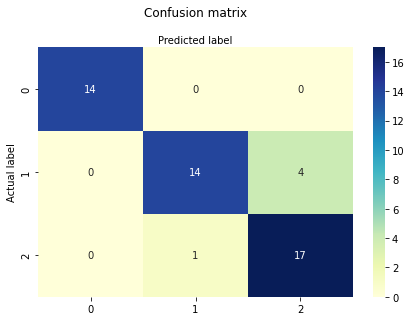

In [124]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Диагональные значения представляют собой точные прогнозы, а недиагональные элементы - неточные прогнозы. На выходе 14, 14  17 - фактические прогнозы, а остальные - неправильные прогнозы.

### Classification Report

Scikit-learn предоставляет удобный отчет при работе над задачами классификации, чтобы дать быстрое представление о точности модели с использованием ряда метрик.

Эта функция также принимает фактические и прогнозируемые выходные данные в качестве аргументов. Она возвращает отчет о классификации в виде словаря.

Функция отображает точность, отзыв, f1-балл и поддержку для каждого класса

In [83]:
# Cross Validation Classification Report
X = array[:,0:4]
Y = array[:,4]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.78      0.85        18
 Iris-virginica       0.81      0.94      0.87        18

       accuracy                           0.90        50
      macro avg       0.91      0.91      0.91        50
   weighted avg       0.91      0.90      0.90        50



## Regression Metrics

### Mean Absolute Error

Средняя абсолютная ошибка (или MAE) представляет собой сумму абсолютных различий между прогнозами и фактическими значениями. Это дает представление о том, насколько неправильными были прогнозы

In [89]:
import sklearn
from sklearn import linear_model

In [100]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:3]
Y = array[:,3]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.148 (0.034)


По результатам видим, что средняя абсолютная ошибка равна 0.148, а дисперсия 0.034, что говорит о том, что значение функции ошибки достаточно мало.

### Mean Squared Error

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: nan (nan)


C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 661, in fit
    X, y = self._validate_data(
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\base.py", line 572, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\79811\anaconda3\lib\si

### R2

In [116]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:3]
Y = array[:,3]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: nan (nan)


C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 661, in fit
    X, y = self._validate_data(
  File "C:\Users\79811\anaconda3\lib\site-packages\sklearn\base.py", line 572, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\79811\anaconda3\lib\si